<a href="https://colab.research.google.com/github/carlosdgerez/machine_learning/blob/main/Socio_Economic_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Developing a Socio-Economic Index for Term Desposit Subscribers

**Executive Problem:**
There are a bunch of social and economic indicators in the data. We should be careful about how we consider these. We may want to see separate models for times when, for example, the consumer confidence index is high compared to when it is low. We'll definitely want to know if it's better to use a particular model during different economic situations.

## Import Libraries

In [1]:
# import libraries
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import seaborn as sns 
# Set some default styling
sns.set()
# Choose a theme
sns.set_style('ticks')

## Load the Data

In [2]:
# Load the dataset
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

## Same Scale Fit

Change all the socio economic features to same scale.

In [17]:
# transform data for the same scale fit

# Create an instance of the transform object we're going to use
scaler = MinMaxScaler()

campaign['emp.var.rate.scaled'] = scaler.fit_transform(campaign[ ['emp.var.rate'] ])
campaign['cons.price.idx.scaled'] = scaler.fit_transform(campaign[ ['cons.price.idx'] ])
campaign['cons.conf.idx.scaled'] = scaler.fit_transform(campaign[['cons.conf.idx']])
campaign['euribor3m.scaled'] = scaler.fit_transform(campaign[ ['euribor3m'] ])
campaign['nr.employed.scaled'] = scaler.fit_transform(campaign[ ['nr.employed'] ])

campaign['emp.var.rate.scaled'].value_counts()

1.000000    16234
0.333333     9184
0.937500     7763
0.687500     3683
0.104167     1663
0.000000     1071
0.354167      773
0.479167      635
0.083333      172
0.666667       10
Name: emp.var.rate.scaled, dtype: int64

## Principal Component Analysis to obtain an Socio-economic Index



```
https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
```

In [4]:
#define the matrix for PCA (dimension reduction)
socio_economic_features = ['emp.var.rate.scaled', 'cons.price.idx.scaled', 'cons.conf.idx.scaled',  'euribor3m.scaled', 'nr.employed.scaled' ]
socio_X = campaign[socio_economic_features]
socio_y = campaign['y']
socio_X.head()

,emp.var.rate.scaled,cons.price.idx.scaled,cons.conf.idx.scaled,euribor3m.scaled,nr.employed.scaled
0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.9375,0.698753,0.60251,0.957379,0.859735



```
Note:
Cange the pca = PCA(4) to see the eigenvalues and eigenvectors of the other principal component. The first component is required for an index. 
```

In [5]:
#create the PCA instance
pca = PCA(1)
pca.fit(socio_X)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_ )

[[-0.54480527 -0.28203894 -0.07493063 -0.65717956 -0.4314414 ]]
[0.35359577]


In [6]:
# transform data
score_socio_X = pca.transform(socio_X)
print(score_socio_X)

[[-0.3975936 ]
 [-0.3975936 ]
 [-0.3975936 ]
 ...
 [ 0.75368673]
 [ 0.75368673]
 [ 0.75368673]]




```
Note: this is a numpy array
```



In [18]:
# convert numpy array to a dataframe
campaign_socio_economic = pd.DataFrame(score_socio_X, columns = ['socio_economic_idx'])
campaign_socio_economic

,socio_economic_idx
0,-0.397594
1,-0.397594
2,-0.397594
3,-0.397594
4,-0.397594
...,...
41183,0.753687
41184,0.753687
41185,0.753687
41186,0.753687


## Charts

Histogram chart shows there are 3 modes in the data which indicates that we should split the data into the 3 different datasets to model for different socio economic time periods.

Text(0.5, 0, 'Socio Economic Index')

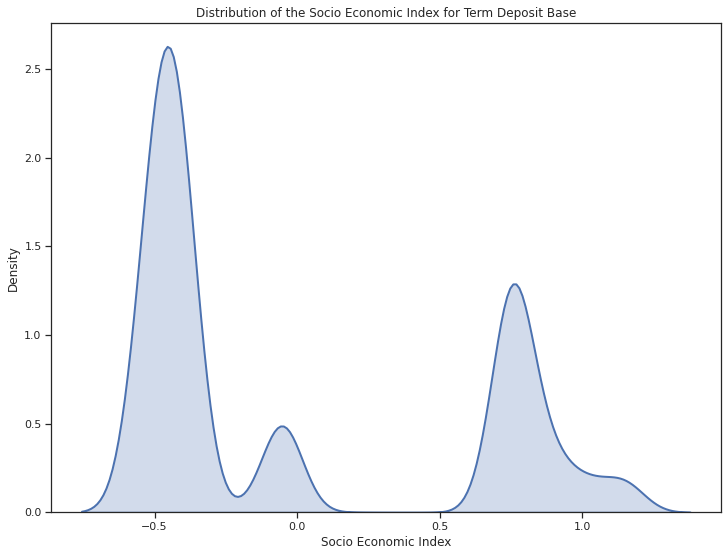

In [8]:
#presentation style
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
ax = sns.kdeplot(x=campaign_socio_economic['socio_economic_idx'], shade=True, linewidth=2)
ax.set_title("Distribution of the Socio Economic Index for Term Deposit Base")
ax.set_xlabel("Socio Economic Index")

We see 3 modes in the data. The bar chart below shows where to to cut-off high, medium and low.

In [9]:
alt.Chart(campaign_socio_economic).mark_bar().encode(
    alt.X('socio_economic_idx', title='Socio Economic Index'),
    alt.Y('count(socio_economic_idx)', title='Number of Leads with Index'),
    alt.Color('socio_economic_idx', legend=None)
).properties(
    title='Term Deposit Subscription Lead Base',
    width=600
)

MaxRowsError: ignored

alt.Chart(...)

## New Feature to Separate Models

In [10]:
# create new High and Low indicator for Socio Economic Index
# Define a function that takes converts the socio-economic indicator to high, medium and low 
def assignNewLabels(label):
    if label >=  0.5:
        return 'High'
    elif label <= -0.1 :
        return 'Low'
    else:
        return 'Medium'
    
campaign_socio_economic['socio_economic_idx_labels'] = campaign_socio_economic['socio_economic_idx'].apply(assignNewLabels)
print(campaign_socio_economic.head())
print(campaign_socio_economic['socio_economic_idx_labels'].value_counts())


   socio_economic_idx socio_economic_idx_labels
0           -0.397594                       Low
1           -0.397594                       Low
2           -0.397594                       Low
3           -0.397594                       Low
4           -0.397594                       Low
Low       24090
High      13498
Medium     3600
Name: socio_economic_idx_labels, dtype: int64


## Master Data File

We should use this file for our models.

In [11]:
#append index dataframe to orginal dataframe

campaign_idx = pd.concat([campaign, campaign_socio_economic], axis=1)
campaign_idx.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,y,emp.var.rate.scaled,cons.price.idx.scaled,cons.conf.idx.scaled,euribor3m.scaled,nr.employed.scaled,socio_economic_idx,socio_economic_idx_labels
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735,-0.397594,Low
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735,-0.397594,Low
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735,-0.397594,Low
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735,-0.397594,Low
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,4.857,5191.0,no,0.9375,0.698753,0.60251,0.957379,0.859735,-0.397594,Low


### Adding new features

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


In [12]:
# previous campaign indicator for data filtering
def assignIndicator(label):
    if label != 999:
        return 'Yes'
    else:
        return 'No'

campaign_idx['previously_contacted_ind'] = campaign_idx['pdays'].apply(assignIndicator)
print(campaign_idx['previously_contacted_ind'].value_counts())

No     39673
Yes     1515
Name: previously_contacted_ind, dtype: int64


poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

In [13]:
# Previous Campaign Indicator for data filtering
def assignPreviousCampaign(label):
    if label == 'success' or  label == 'failure':
        return 'Yes'
    else:
        return 'No'

campaign_idx['previous_campaign_ind'] = campaign_idx['poutcome'].apply(assignPreviousCampaign)
print(campaign_idx['previous_campaign_ind'].value_counts())


No     35563
Yes     5625
Name: previous_campaign_ind, dtype: int64


In [14]:
campaign_idx

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,y,emp.var.rate.scaled,cons.price.idx.scaled,cons.conf.idx.scaled,euribor3m.scaled,nr.employed.scaled,socio_economic_idx,socio_economic_idx_labels,previously_contacted_ind,previous_campaign_ind
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,no,0.937500,0.698753,0.60251,0.957379,0.859735,-0.397594,Low,No,No
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,no,0.937500,0.698753,0.60251,0.957379,0.859735,-0.397594,Low,No,No
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,no,0.937500,0.698753,0.60251,0.957379,0.859735,-0.397594,Low,No,No
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,no,0.937500,0.698753,0.60251,0.957379,0.859735,-0.397594,Low,No,No
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,no,0.937500,0.698753,0.60251,0.957379,0.859735,-0.397594,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,yes,0.479167,1.000000,0.00000,0.089322,0.000000,0.753687,High,No,No
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,no,0.479167,1.000000,0.00000,0.089322,0.000000,0.753687,High,No,No
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,no,0.479167,1.000000,0.00000,0.089322,0.000000,0.753687,High,No,No
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,yes,0.479167,1.000000,0.00000,0.089322,0.000000,0.753687,High,No,No


The above indicator should be used to keep customers who were on the previous campaign to answer the executives first objection about what was significant features. Run model off this base only.